In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score,plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [76]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking the null values in dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are null values which needs to be replaced and features other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and estimated_generation_gwh are having only NaNs so we shall drop those<br>

I feel source,country, country_long, name, url, gppd_idnr and owner features doesn't give weitage to predict targets

Features year_of_capacity_data and generation_data_source are having same values in all the rows so they don't contribute much to predict target so we shall delete them as well

In [4]:
df.drop(['source','country','country_long','name','url','gppd_idnr','owner','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','year_of_capacity_data','generation_data_source'],axis=1, inplace=True)

In [5]:
#Checking shape of dataset
df.shape

(907, 12)

In [6]:
#Fill NaNs with most occuring data using simple imputer
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,0.0,0.0,0.0,0.0,0.0
1,98.0,24.7663,74.609,Coal,Oil,2015.0,WRI,0.0,0.0,0.0,0.0,0.0
2,39.2,21.9038,69.3732,Wind,Oil,2015.0,WRI,0.0,0.0,0.0,0.0,0.0
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747,886.004428,663.7745,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.55,5916.37,6243.0,5385.579736,7279.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,0.0,0.994875,233.59665,865.4,686.5
903,3.0,12.8932,78.1654,Solar,Oil,2015.0,Industry About,0.0,0.0,0.0,0.0,0.0
904,25.5,15.2758,75.5811,Wind,Oil,2015.0,WRI,0.0,0.0,0.0,0.0,0.0
905,80.0,24.35,73.7477,Coal,Oil,2015.0,WRI,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   capacity_mw          907 non-null    object
 1   latitude             907 non-null    object
 2   longitude            907 non-null    object
 3   primary_fuel         907 non-null    object
 4   other_fuel1          907 non-null    object
 5   commissioning_year   907 non-null    object
 6   geolocation_source   907 non-null    object
 7   generation_gwh_2014  907 non-null    object
 8   generation_gwh_2015  907 non-null    object
 9   generation_gwh_2016  907 non-null    object
 10  generation_gwh_2017  907 non-null    object
 11  generation_gwh_2018  907 non-null    object
dtypes: object(12)
memory usage: 85.2+ KB


In [8]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,0.0,0.0,0.0,0.0,0.0
1,98.0,24.7663,74.609,Coal,Oil,2015.0,WRI,0.0,0.0,0.0,0.0,0.0
2,39.2,21.9038,69.3732,Wind,Oil,2015.0,WRI,0.0,0.0,0.0,0.0,0.0
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747,886.004428,663.7745,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.55,5916.37,6243.0,5385.579736,7279.0


In [9]:
df['capacity_mw']=df['capacity_mw'].astype('float')
df['latitude']=df['latitude'].astype('float')
df['longitude']=df['longitude'].astype('float')
df['commissioning_year']=df['commissioning_year'].astype('float')
df['generation_gwh_2014']=df['generation_gwh_2014'].astype('float')
df['generation_gwh_2015']=df['generation_gwh_2015'].astype('float')
df['generation_gwh_2016']=df['generation_gwh_2016'].astype('float')
df['generation_gwh_2017']=df['generation_gwh_2017'].astype('float')
df['generation_gwh_2018']=df['generation_gwh_2018'].astype('float')

In [10]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.086467,77.172109,2004.594267,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,6.098262,4.976401,15.734928,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,73.811550,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,2015.000000,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [114]:
print(df['primary_fuel'].unique())
print(df['other_fuel1'].unique())
print(df['geolocation_source'].unique())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
['Oil' 'Cogeneration' 'Gas']
['National Renewable Energy Laboratory' 'WRI' 'Industry About']


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['other_fuel1'] = le.fit_transform(df['other_fuel1'])
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2015.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,1,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
#Check the statistical data
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.086467,77.172109,3.206174,1.995590,2004.594267,1.733186,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,6.098262,4.976401,2.280652,0.081259,15.734928,0.677151,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,73.811550,1.000000,2.000000,1998.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,3.000000,2.000000,2014.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2015.000000,2.000000,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


From the above table we can see that the features country, other_fuel2, generation_data_source does not give much weitage to predict target, we shall drop those features

In [14]:
df.shape

(907, 12)

In [15]:
df.tail()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.0,0.994875,233.59665,865.4,686.5
903,3.0,12.8932,78.1654,6,2,2015.0,0,0.0,0.000000,0.00000,0.0,0.0
904,25.5,15.2758,75.5811,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0
905,80.0,24.3500,73.7477,1,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0
906,16.5,9.9344,77.4768,7,2,2015.0,2,0.0,0.000000,0.00000,0.0,0.0


In [20]:
#Check the statistical data
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.086467,77.172109,3.206174,1.995590,2004.594267,43.847850,94.469680,1.733186,2019.0,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,261.972645,261.972645,590.085456,6.098262,4.976401,2.280652,0.081259,15.734928,44.642818,70.381222,0.677151,0.0,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,17.072000,73.811550,1.000000,2.000000,1998.000000,22.000000,58.000000,2.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,453.000000,453.000000,59.200000,21.281800,76.493800,3.000000,2.000000,2014.000000,22.000000,58.000000,2.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2015.000000,29.500000,115.500000,2.000000,2019.0,556.562750,598.926350,670.039394,709.290725,687.754000
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,190.000000,303.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


From the above table we could see that there exists outliers in capacity_mw, source, url, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018

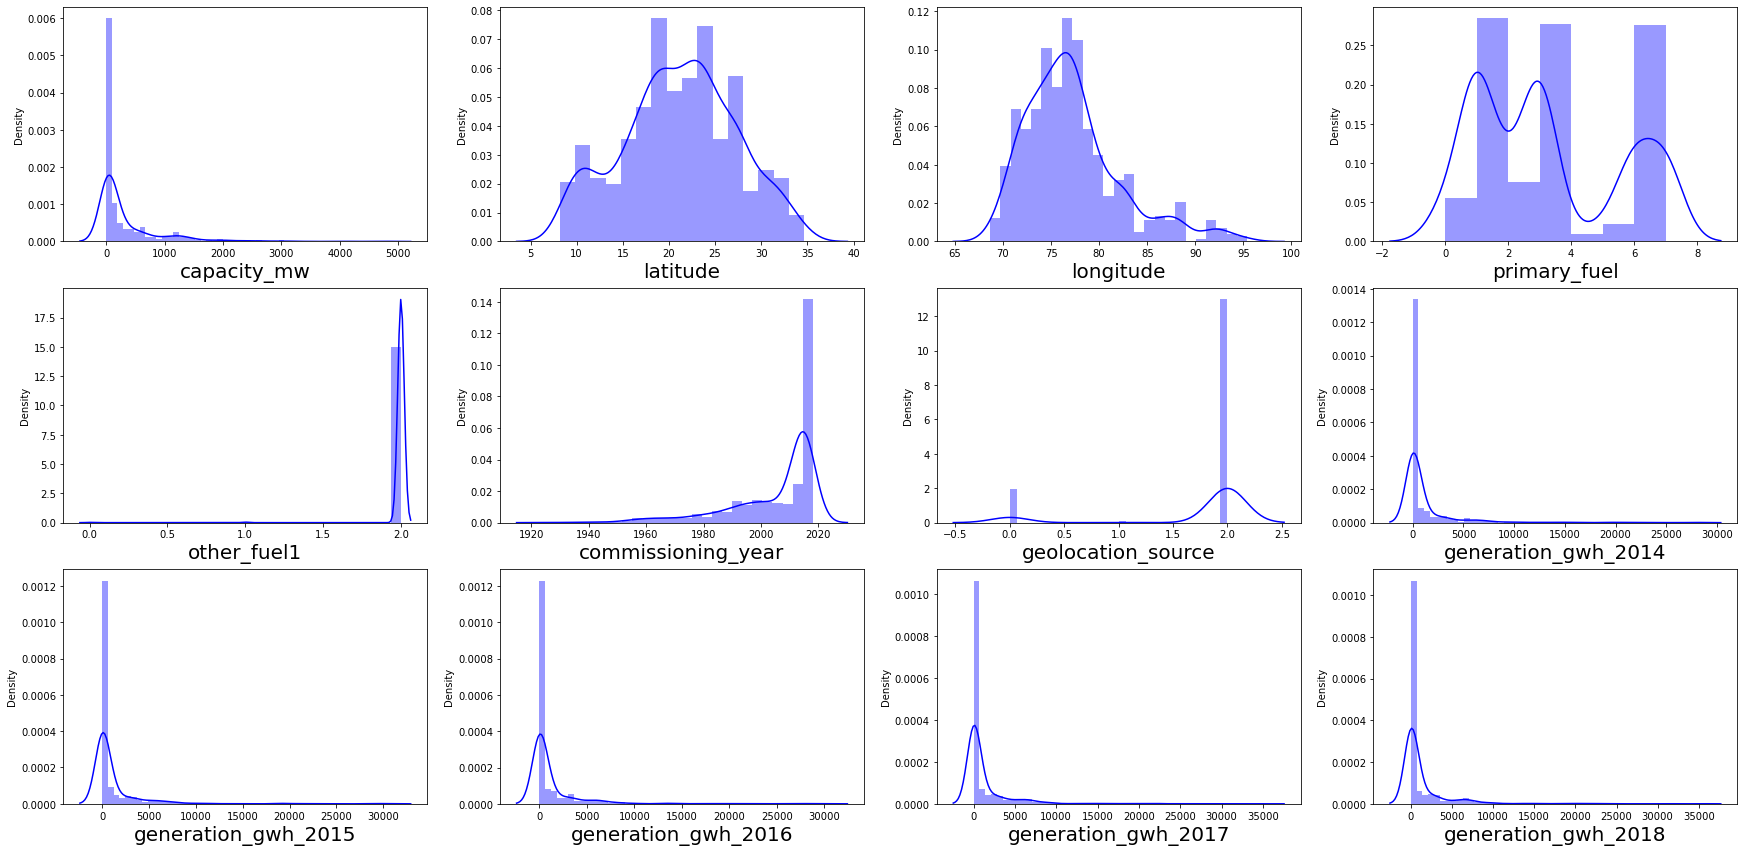

In [16]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=17:
        ax = plt.subplot(5,4,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

From the distribution plot also we could see many outliers, let us remove using zscore

In [17]:
from scipy.stats import zscore
#Features having outliers
features=df[['other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,2,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2015.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,1,2,2015.0,2,0.000000,0.000000,0.000000,0.000000,0.000000


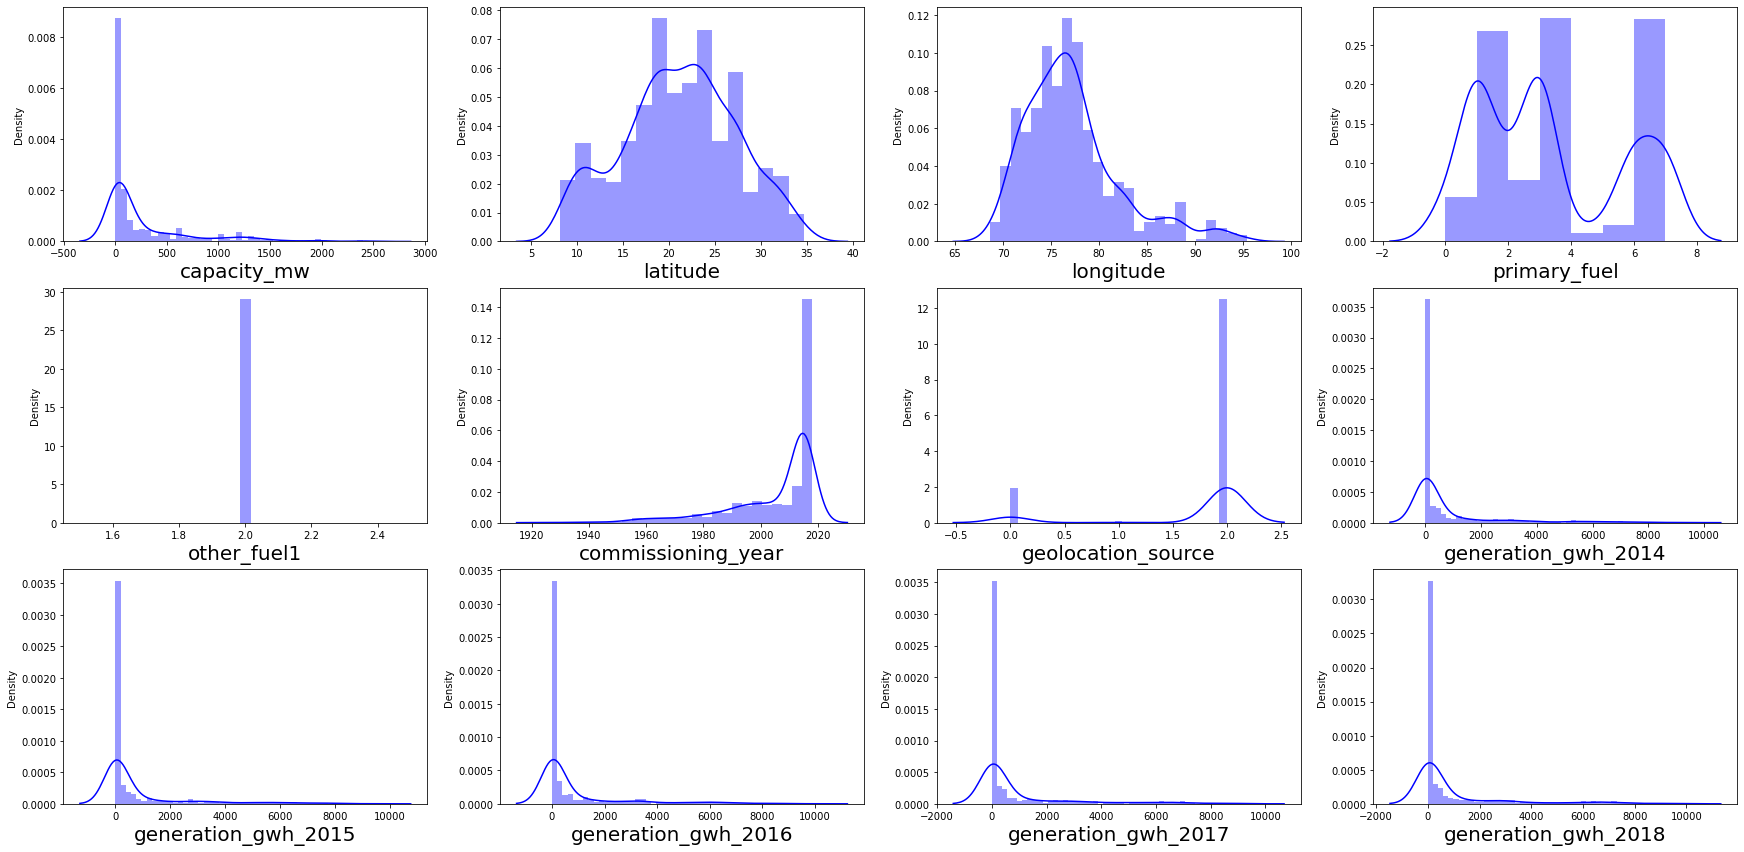

In [18]:
#Visualize the data distribution after outliers removal
plt.figure(figsize = (30,25))
n = 1

for column in df_new:
    if n <=17:
        ax = plt.subplot(5,4,n)
        sns.distplot(df_new[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

In [19]:
#Checking shape of new dataset
df_new.shape

(884, 12)

In [20]:
#Checking dataloss
Dataloss = (((907-884)/907)*100)
print(Dataloss)

2.535832414553473


So, I can see 2.5% dataloss in zscore method after removing outliers which is ok

In [21]:
#Checking for Skewness
df_new.skew()

capacity_mw            2.232067
latitude              -0.090185
longitude              1.183659
primary_fuel           0.439891
other_fuel1            0.000000
commissioning_year    -1.735685
geolocation_source    -2.116425
generation_gwh_2014    2.833541
generation_gwh_2015    2.638559
generation_gwh_2016    2.573483
generation_gwh_2017    2.487354
generation_gwh_2018    2.529445
dtype: float64

Since other_fuel1 is categorical data skeweness doesn't matter

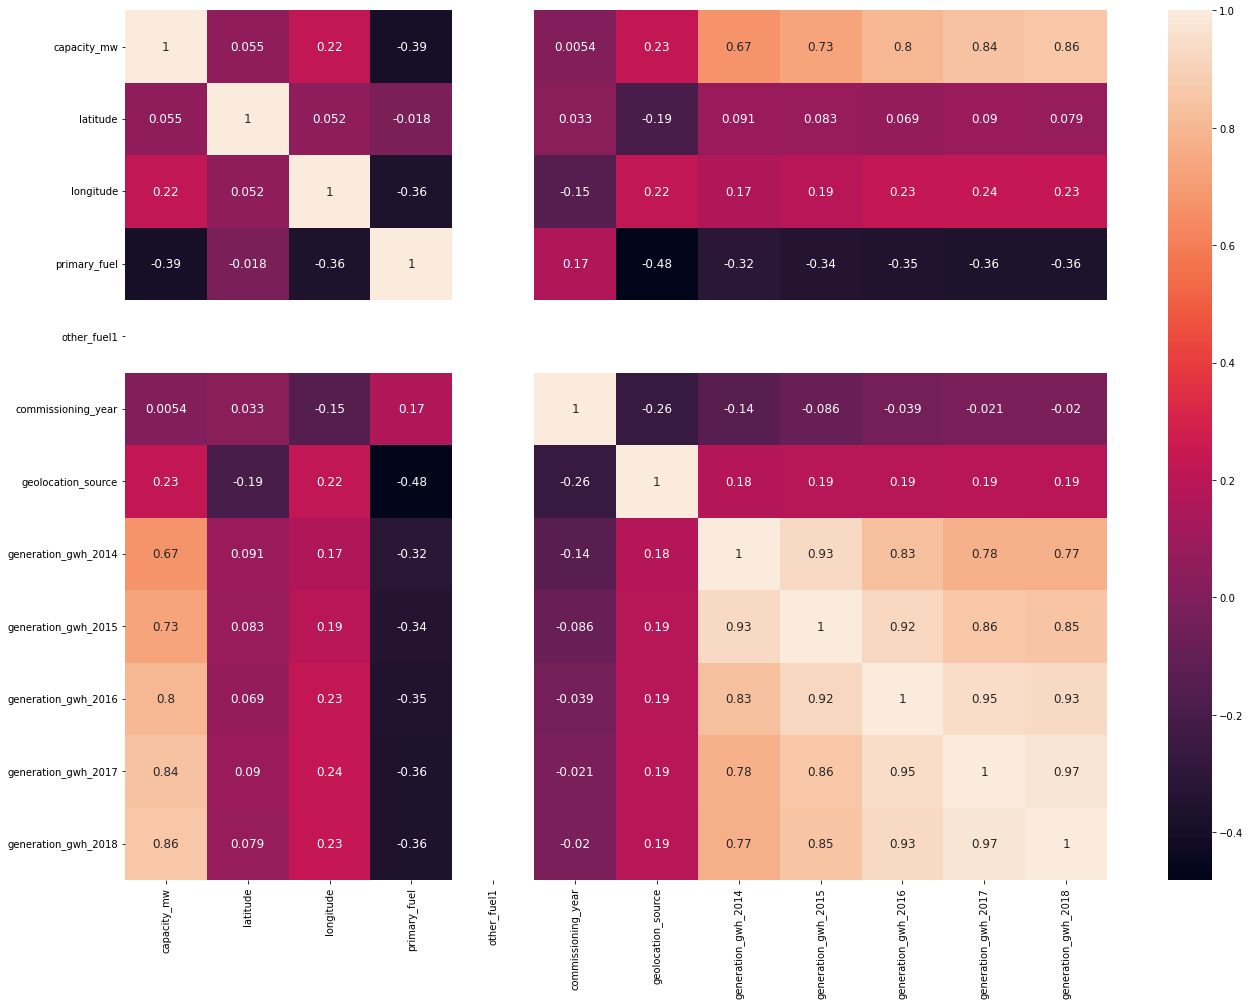

In [22]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

other_fuel1 and year_of_capacity_data are categorical features so we can ignore them here.<br>
generation_gwth_2014,generation_gwth_2015,generation_gwth_2016,generation_gwth_2017,generation_gwth_2018 are looks like correlated

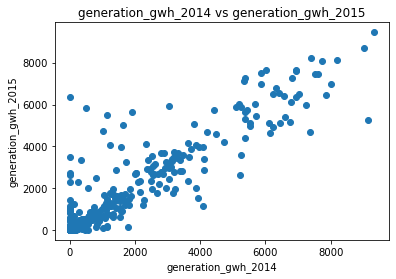

In [23]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2014'],df_new['generation_gwh_2015'])
plt.xlabel('generation_gwh_2014')
plt.ylabel('generation_gwh_2015')
plt.title('generation_gwh_2014 vs generation_gwh_2015')
plt.show()

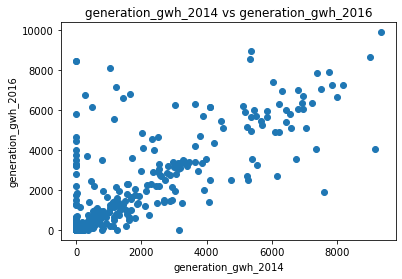

In [24]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2014'],df_new['generation_gwh_2016'])
plt.xlabel('generation_gwh_2014')
plt.ylabel('generation_gwh_2016')
plt.title('generation_gwh_2014 vs generation_gwh_2016')
plt.show()

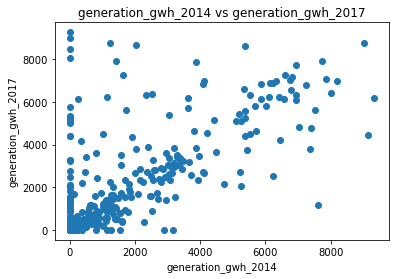

In [25]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2014'],df_new['generation_gwh_2017'])
plt.xlabel('generation_gwh_2014')
plt.ylabel('generation_gwh_2017')
plt.title('generation_gwh_2014 vs generation_gwh_2017')
plt.show()

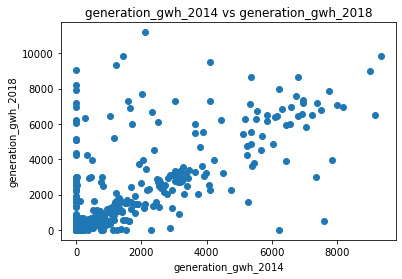

In [31]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2014'],df_new['generation_gwh_2018'])
plt.xlabel('generation_gwh_2014')
plt.ylabel('generation_gwh_2018')
plt.title('generation_gwh_2014 vs generation_gwh_2018')
plt.show()

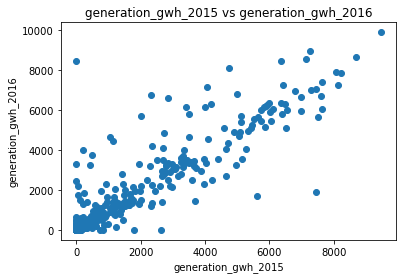

In [26]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2015'],df_new['generation_gwh_2016'])
plt.xlabel('generation_gwh_2015')
plt.ylabel('generation_gwh_2016')
plt.title('generation_gwh_2015 vs generation_gwh_2016')
plt.show()

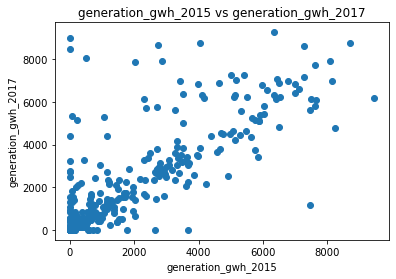

In [27]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2015'],df_new['generation_gwh_2017'])
plt.xlabel('generation_gwh_2015')
plt.ylabel('generation_gwh_2017')
plt.title('generation_gwh_2015 vs generation_gwh_2017')
plt.show()

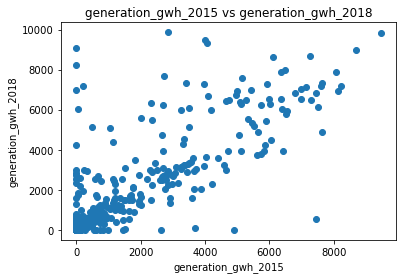

In [28]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2015'],df_new['generation_gwh_2018'])
plt.xlabel('generation_gwh_2015')
plt.ylabel('generation_gwh_2018')
plt.title('generation_gwh_2015 vs generation_gwh_2018')
plt.show()

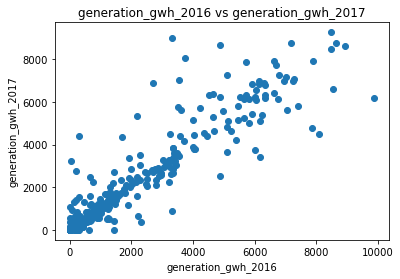

In [29]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2016'],df_new['generation_gwh_2017'])
plt.xlabel('generation_gwh_2016')
plt.ylabel('generation_gwh_2017')
plt.title('generation_gwh_2016 vs generation_gwh_2017')
plt.show()

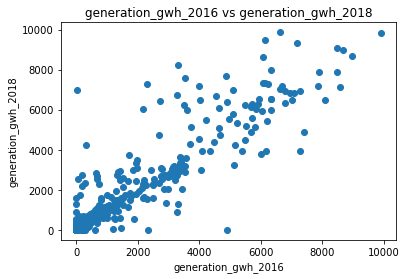

In [30]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2016'],df_new['generation_gwh_2018'])
plt.xlabel('generation_gwh_2016')
plt.ylabel('generation_gwh_2018')
plt.title('generation_gwh_2016 vs generation_gwh_2018')
plt.show()

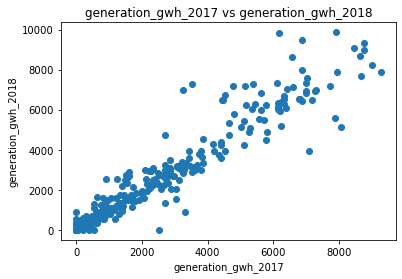

In [31]:
# Check if they are really related
plt.scatter(df_new['generation_gwh_2017'],df_new['generation_gwh_2018'])
plt.xlabel('generation_gwh_2017')
plt.ylabel('generation_gwh_2018')
plt.title('generation_gwh_2017 vs generation_gwh_2018')
plt.show()

Looks like all these fetures are correlated. generation_gwh_2017 and generation_gwh_2018 are higly correlated and they are almost equally correlated with the targets.Let us go with VIF

In [32]:
x = df_new.drop(['primary_fuel','capacity_mw'],axis=1)
y1 = df_new['primary_fuel']
#y2 = df_new['capacity_mw'].astype('int')
y2 = df_new['capacity_mw']

In [33]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [34]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.072886,latitude
1,1.119922,longitude
2,NaN,other_fuel1
3,1.132634,commissioning_year
4,1.198688,geolocation_source
5,7.906836,generation_gwh_2014
6,16.314183,generation_gwh_2015
7,17.901391,generation_gwh_2016
8,24.242642,generation_gwh_2017
9,18.074494,generation_gwh_2018


Again generation_gwth_2014,generation_gwth_2015,generation_gwth_2016, generation_gwh_2017 and generation_gwh_2018 are high VIF,let us go ahead with selectKBEst method

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif,k=10)
fit = best_features.fit(x,y1)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['feature_name','score']
print(feature_scores.nlargest(10,'score'))

          feature_name        score
4   geolocation_source  2619.350397
3   commissioning_year   105.147505
8  generation_gwh_2017    54.529217
9  generation_gwh_2018    53.165363
7  generation_gwh_2016    50.691716
6  generation_gwh_2015    46.309768
5  generation_gwh_2014    39.601010
1            longitude    28.475282
0             latitude    14.894945


Based on SelectKBest method, let us drop the features other_fuel1 and year_of_capacity_data

In [42]:
x = df_new.drop(['generation_gwh_2018'],axis=1)

In [43]:
x_scaled=sc.fit_transform(x)

In [63]:
#Split the data into 2 parts using Hold Out method for primary_furl target which is classification data
x_train,x_test,y_train,y_test=train_test_split(df_new,y1,test_size=0.25,random_state=99)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=lr.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,gb_pred))

accuracy_score: 0.45701357466063347


In [70]:
conf_matrix = confusion_matrix(y_test,gb_pred)
conf_matrix

array([[ 0,  0,  0,  0,  0,  0, 11,  1],
       [ 0, 34,  0,  8,  0,  0,  4,  3],
       [ 0,  8,  0, 10,  0,  0,  2,  0],
       [ 0, 12,  0, 38,  0,  0, 18,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1],
       [ 0,  0,  0,  2,  0,  0, 24,  3],
       [ 0,  0,  0,  3,  0,  0, 29,  5]], dtype=int64)

In [71]:
print(classification_report(y_test,gb_pred,digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.69      0.65        49
           2       0.00      0.00      0.00        20
           3       0.59      0.56      0.58        68
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.27      0.83      0.41        29
           7       0.38      0.14      0.20        37

    accuracy                           0.46       221
   macro avg       0.23      0.28      0.23       221
weighted avg       0.42      0.46      0.41       221



In [72]:
print(cross_val_score(gb,x_scaled,y1,cv=5).mean())

0.9977401129943504


In [65]:
# model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))
print(cross_val_score(knn,x_scaled,y1,cv=5).mean())

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.62      0.88      0.73        49
           2       0.33      0.10      0.15        20
           3       0.79      0.84      0.81        68
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.91      0.72      0.81        29
           7       0.82      0.86      0.84        37

    accuracy                           0.74       221
   macro avg       0.54      0.52      0.52       221
weighted avg       0.71      0.74      0.72       221

0.9095338983050848


In [66]:
from sklearn.tree import DecisionTreeClassifier
# DT model instantiation with default parameters
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))
print(cross_val_score(dtc,x_scaled,y1,cv=5).mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        68
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        37

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

1.0


In [67]:
from sklearn.ensemble import RandomForestClassifier
# DT model instantiation with default parameters
rfc = RandomForestClassifier()
# Train the model
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))
print(cross_val_score(rfc,x_scaled,y1,cv=5).mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        20
           3       0.97      1.00      0.99        68
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        37

    accuracy                           0.99       221
   macro avg       1.00      0.92      0.94       221
weighted avg       0.99      0.99      0.99       221

0.9886941448382126


In [75]:
disp = plot_roc_curve(gb,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dtc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

ValueError: GradientBoostingClassifier should be a binary classifier

In [52]:
#Split the data into 2 parts using Hold Out method for capacity_mw target which is continuous data
x_train,x_test,y_train,y_test=train_test_split(df_new,y2,test_size=0.25,random_state=99)

In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('Accuracy:',lr.score(x_test,lr_pred))
print('mse:',metrics.mean_squared_error(y_test,lr_pred))
print('mae:',metrics.mean_absolute_error(y_test,lr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

Accuracy: 1.0
mse: 3.5791938619662816e-24
mae: 1.1943678826245523e-12
rmse: 1.8918757522539058e-12


In [55]:
from sklearn.tree import DecisionTreeRegressor
# DT model instantiation with default parameters
dt = DecisionTreeRegressor()
# Train the model
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
print('Accuracy:',r2_score(y_test,dt_pred))
print('mse:',metrics.mean_squared_error(y_test,dt_pred))
print('mae:',metrics.mean_absolute_error(y_test,dt_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

Accuracy: 0.998776162531307
mse: 258.0518012488688
mae: 4.175502262443439
rmse: 16.063990825721632


In [56]:
from sklearn.ensemble import RandomForestRegressor
# DT model instantiation with default parameters
rf = RandomForestRegressor()
# Train the model
rf.fit(x_train,y_train)
rf_pred = dt.predict(x_test)
print('Accuracy:',r2_score(y_test,rf_pred))
print('mse:',metrics.mean_squared_error(y_test,rf_pred))
print('mae:',metrics.mean_absolute_error(y_test,rf_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

Accuracy: 0.998776162531307
mse: 258.0518012488688
mae: 4.175502262443439
rmse: 16.063990825721632


In [57]:
from sklearn.ensemble import AdaBoostRegressor
# DT model instantiation with default parameters
ab = AdaBoostRegressor()
# Train the model
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)
print('Accuracy:',r2_score(y_test,ab_pred))
print('mse:',metrics.mean_squared_error(y_test,ab_pred))
print('mae:',metrics.mean_absolute_error(y_test,ab_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,ab_pred)))

Accuracy: 0.9947728179770388
mse: 1102.175551073296
mae: 28.569910630603935
rmse: 33.19902936944537


In [97]:
# save the model to disk
filename = 'Power_Plant_Model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([ 7.00000000e+01,  3.00000000e+01,  1.20000000e+01,  1.48500000e+01,
        5.00000000e+01,  1.00000000e+00,  6.60000000e+00,  3.00000000e+02,
        2.72300000e+02,  6.00000000e+01,  7.02860000e+02,  3.30000000e+00,
        1.35000000e+02,  9.20000000e+02,  1.06000000e+02,  6.00000000e+01,
        9.70000000e+01,  7.80000000e+02,  4.00000000e+02,  6.48000000e+02,
        1.87200000e+02,  3.50000000e+01,  1.20000000e+03,  5.00000000e+00,
        3.00000000e+01,  3.00000000e+00,  5.00000000e+00,  1.20000000e+01,
        1.98000000e+03,  9.00000000e+01,  2.04000000e+01,  1.80000000e+01,
        5.00000000e+00,  1.01000000e+02,  2.50000000e+01,  1.60000000e+01,
        1.50000000e+00,  5.00000000e+02,  1.32000000e+03,  2.10000000e+00,
        3.00000000e+01,  2.60000000e+01,  4.50000000e+02,  3.50000000e+01,
        1.20000000e+03,  3.00000000e+00,  6.00000000e+02,  5.00000000e+00,
        5.00000000e+02, -4.79780915e-13,  3.30000000e+02,  6.00000000e+02,
        5.04000000e+01,  

In [98]:
pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
Predicted,70.0,30.0,12.0,14.85,50.0,1.0,6.6,300.0,272.3,60.0,...,75.0,28.3,26.4,46.0,12.0,43.0,3.0,34.65,10.0,15.0
Original,70.0,30.0,12.0,14.85,50.0,1.0,6.6,300.0,272.3,60.0,...,75.0,28.3,26.4,46.0,12.0,43.0,3.0,34.65,10.0,15.0
